# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# OpenWeather Key
api_key = weather_api_key
units = "imperial"

query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={units}&q="

# define count of pass throughs 
count_one = 0
set_one = 1

print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=28dd5bd9fdcd0365d2a88aabf63d3125&units=imperial&q=


In [4]:
# Create lists to store data for dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | nyurba
Processing Record 2 of Set 1 | majene
Processing Record 3 of Set 1 | new norfolk
Processing Record 4 of Set 1 | saint-joseph
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | arraial do cabo
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | gawler
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | anadyr
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | hilo
Processing Record 14 of Set 1 | cayenne
Processing Record 15 of Set 1 | sola
Processing Record 16 of Set 1 | wuwei
Processing Record 17 of Set 1 | kruisfontein
Processing Record 18 of Set 1 | barrow
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | borba
Processing Record 21 of Set 1 | juneau
Processing Record 22 of Set 1 | cherskiy
Processing Record 23 of Set 1 | kahului
Processing Record 24 of Set 1 | grand river south east
Processing Record 25 of 

Processing Record 42 of Set 4 | santa ines
Processing Record 43 of Set 4 | heihe
Processing Record 44 of Set 4 | emerald
Processing Record 45 of Set 4 | ribeira grande
City not found. Skipping...
Processing Record 46 of Set 4 | ust-omchug
Processing Record 47 of Set 4 | belyy yar
Processing Record 48 of Set 4 | severo-kurilsk
Processing Record 49 of Set 4 | niono
Processing Record 1 of Set 5 | stornoway
City not found. Skipping...
Processing Record 2 of Set 5 | norman wells
Processing Record 3 of Set 5 | teya
Processing Record 4 of Set 5 | sitka
Processing Record 5 of Set 5 | aldan
Processing Record 6 of Set 5 | karwar
Processing Record 7 of Set 5 | ambilobe
Processing Record 8 of Set 5 | baykit
Processing Record 9 of Set 5 | makakilo city
Processing Record 10 of Set 5 | lasa
Processing Record 11 of Set 5 | bengkulu
Processing Record 12 of Set 5 | yuanping
City not found. Skipping...
Processing Record 13 of Set 5 | ulladulla
Processing Record 14 of Set 5 | frankenberg
Processing Record

Processing Record 27 of Set 8 | cap-aux-meules
Processing Record 28 of Set 8 | dalbandin
Processing Record 29 of Set 8 | brae
Processing Record 30 of Set 8 | agadez
Processing Record 31 of Set 8 | silifke
Processing Record 32 of Set 8 | payo
Processing Record 33 of Set 8 | sabang
Processing Record 34 of Set 8 | kozyatyn
Processing Record 35 of Set 8 | jalingo
Processing Record 36 of Set 8 | chimbote
Processing Record 37 of Set 8 | strezhevoy
City not found. Skipping...
Processing Record 38 of Set 8 | longyearbyen
Processing Record 39 of Set 8 | qasigiannguit
Processing Record 40 of Set 8 | solwezi
Processing Record 41 of Set 8 | hualmay
Processing Record 42 of Set 8 | moindou
Processing Record 43 of Set 8 | mitsamiouli
Processing Record 44 of Set 8 | gemunden
Processing Record 45 of Set 8 | madawaska
Processing Record 46 of Set 8 | husavik
Processing Record 47 of Set 8 | rosetown
Processing Record 48 of Set 8 | oussouye
City not found. Skipping...
Processing Record 49 of Set 8 | avera


Processing Record 17 of Set 12 | dera gopipur
Processing Record 18 of Set 12 | bagdarin
Processing Record 19 of Set 12 | port shepstone
------------------------------
Data Retrieval Complete
------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
# Create dataframe
weather_dict = {
    "City": city_two,
    "Cloudiness": cloudinesses,
    "Country": countries,
    "Date": dates,
    "Humidity": humidities,
    "Lat": lats,
    "Lng": lngs,
    "Max Temp": max_temps,
    "Wind Speed": wind_speeds
}

In [12]:
weather_df = pd.DataFrame(weather_dict)

# show the top of the dataframe
weather_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,nyurba,11,RU,1604279755,90,63.28,118.33,1.98,9.89
1,majene,100,ID,1604279755,70,-3.54,118.97,83.84,7.38
2,new norfolk,12,LR,1604279628,97,6.65,-10.59,74.08,2.59
3,saint-joseph,90,RE,1604279755,56,-21.37,55.62,69.80,5.82
4,hermanus,80,ZA,1604279592,81,-34.42,19.23,64.00,10.00
5,arraial do cabo,0,BR,1604279756,67,-22.84,-46.65,60.80,16.11
6,rikitea,93,PF,1604279756,85,-23.12,-134.97,74.16,23.53
7,bredasdorp,100,ZA,1604279606,82,-34.53,20.04,64.40,10.29
8,gawler,46,AU,1604279589,28,-34.60,138.73,84.00,7.00
9,mataura,83,NZ,1604279521,67,-46.19,168.86,55.00,13.00


In [13]:
# Export dataframe to csv
weather_df.to_csv("Output/weather_df.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# weather_df['Humidity'] = weather_df['Humidity'].astype(int)

In [10]:
# clean_weather_df = weather_df.loc[["Humidity" > 100]]

TypeError: '>' not supported between instances of 'str' and 'int'

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

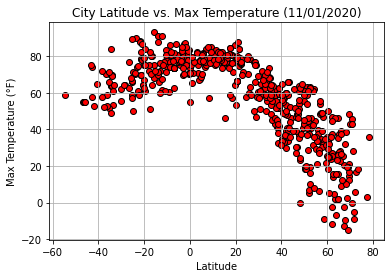

In [15]:
# Build scatter plot with related data
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], facecolors="red", marker="o", edgecolor="black")

# Format the graph labels
plt.title("City Latitude vs. Max Temperature (11/01/2020)")
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("Output/Latitude_vs_Temperature.png")

# Show Plot
plt.show()

## Latitude vs. Humidity Plot

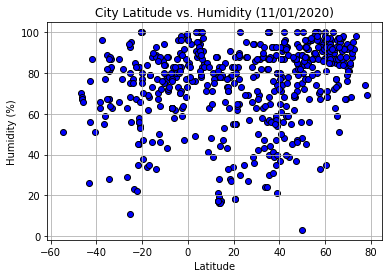

In [16]:
# Build scatter plot with related data
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolors="blue", marker="o", edgecolor="black")

# Format graph labels
plt.title("City Latitude vs. Humidity (11/01/2020)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("Output/Latitude_vs_Humidity.png")

# Show Plot
plt.show()

## Latitude vs. Cloudiness Plot

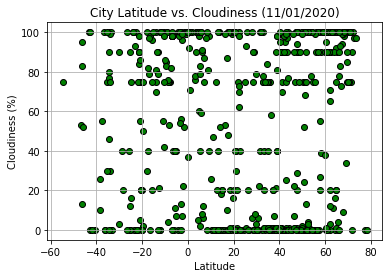

In [18]:
# Build scatter plot with related data
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], facecolors="green", marker="o", edgecolor="black")

# Format graph labels
plt.title("City Latitude vs. Cloudiness (11/01/2020)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("Output/Latitude_vs_Cloudiness.png")

# Show Plot
plt.show()

## Latitude vs. Wind Speed Plot

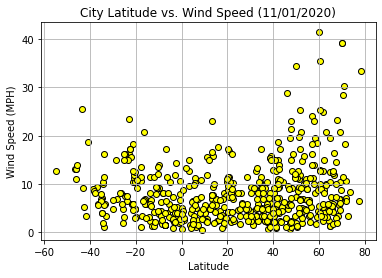

In [20]:
# Build scatter plot with related data
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], facecolors="yellow", marker="o", edgecolor="black")

# Format graph labels
plt.title("City Latitude vs. Wind Speed (11/01/2020)")
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("Output/Latitude_vs_Wind_Speed.png")

# Show Plot
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression